# 1.1 Базовые элементы языка Python

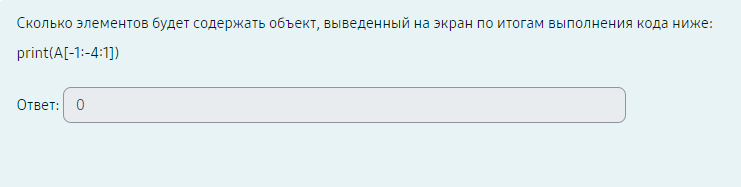

In [1]:
A = [x for x in range(1, 10)]

print(A)
print(A[-1:-4:1])

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[]


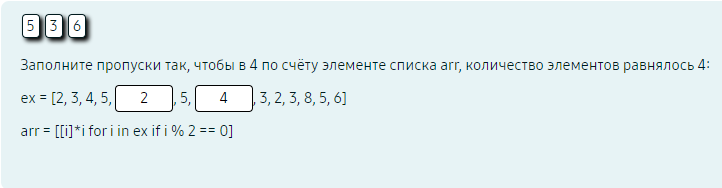

In [2]:
ex = [2, 3, 4, 5, 4, 5, 2, 3, 2, 3, 8, 5, 6]

arr = [[i]*i for i in ex if i % 2 == 0]

print(arr)

[[2, 2], [4, 4, 4, 4], [4, 4, 4, 4], [2, 2], [2, 2], [8, 8, 8, 8, 8, 8, 8, 8], [6, 6, 6, 6, 6, 6]]


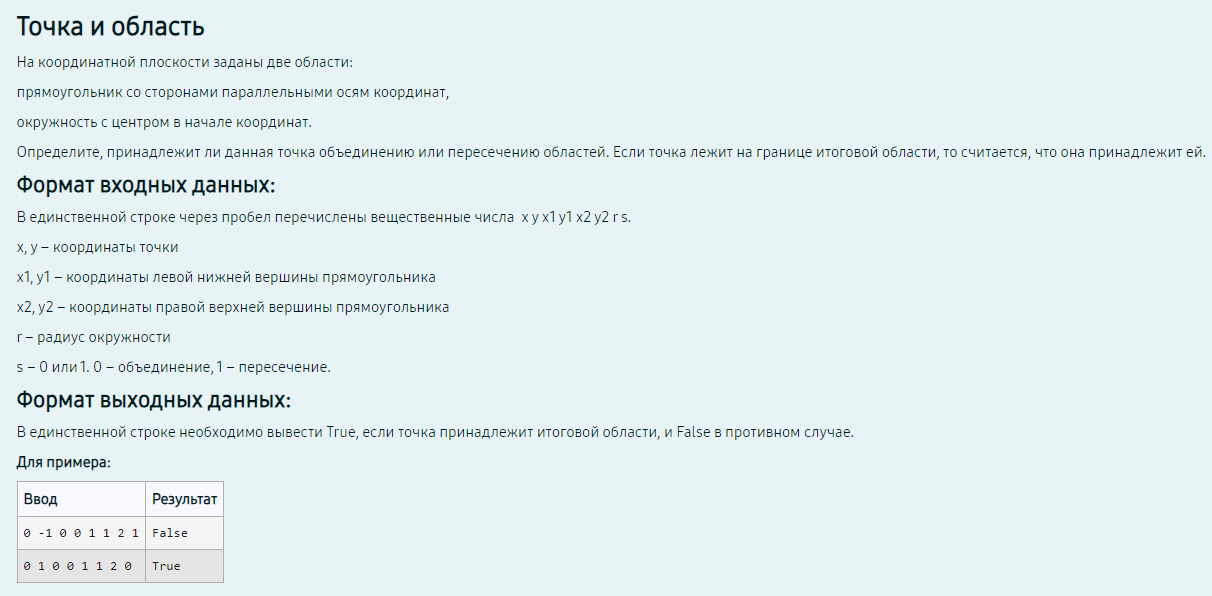

In [4]:
def Importance(x, y, x1, y1, x2, y2, r, s):
    if s == 0 and (((x1 <= x <= x2) and (y1 <= y <= y2)) or ((x**2 + y**2) <= r**2)):
        return True
    elif s == 1 and (((x1 <= x <= x2) and (y1 <= y <= y2)) and ((x**2 + y**2) <= r**2)):
        return True
    return False


x, y, x1, y1, x2, y2, r, s = map(float, input().split())

print(Importance(x, y, x1, y1, x2, y2, r, s))

False


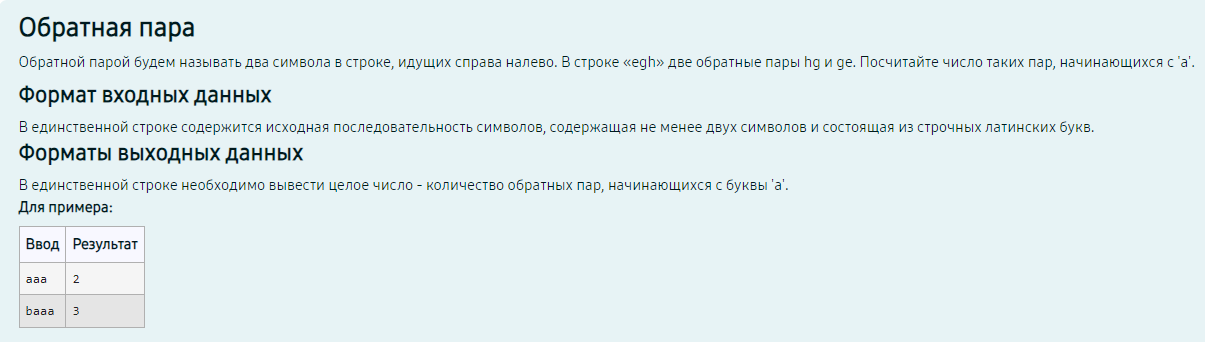

In [5]:
word = str(input())

i = len(word) - 1
n = 0
while i > 0:
    if word[i] == 'a':
        n += 1
    i -= 1

print(n)

2


# 1.2. Библиотека Numpy

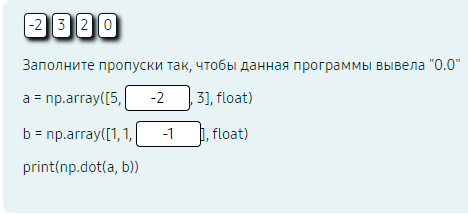

In [6]:
import numpy as np

a = np.array([5, -2, 3])
b = np.array([1, 1, -1])

np.dot(a, b)

0

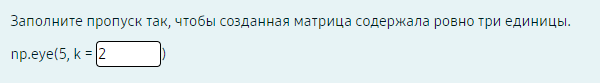

In [7]:
np.eye(5, k = 2)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

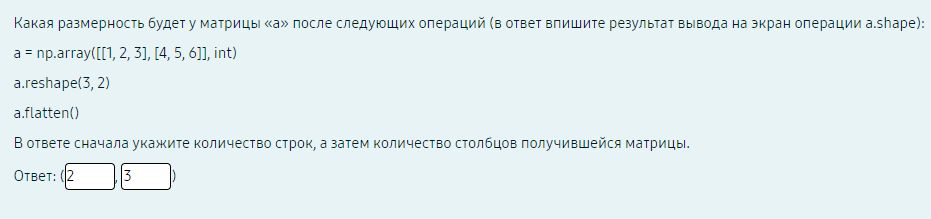

In [10]:
a = np.array([[1, 2, 3], [4, 5, 6]], int)

a.reshape(3, 2)

a.flatten()

a.shape

(2, 3)

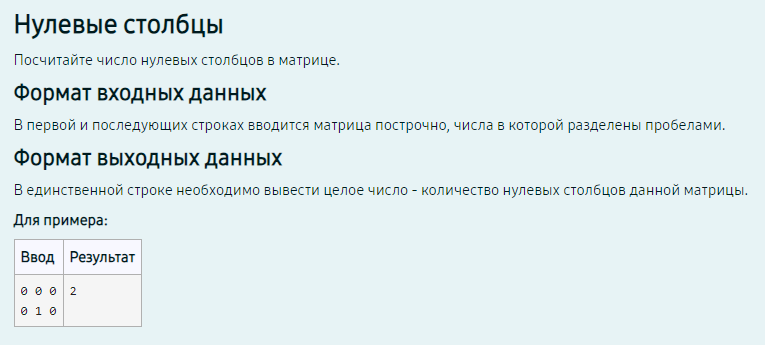

In [11]:
A = np.array([[0, 0, 0], [0, 1, 0]])

print(np.sum(np.all(A == 0, axis=0)))

2


In [ ]:
import sys
import numpy as np

A = []
for line in sys.stdin:
    A.append([float(x) for x in line.split()])
A = np.array(A)

print(np.sum(np.all(A == 0, axis=0)))

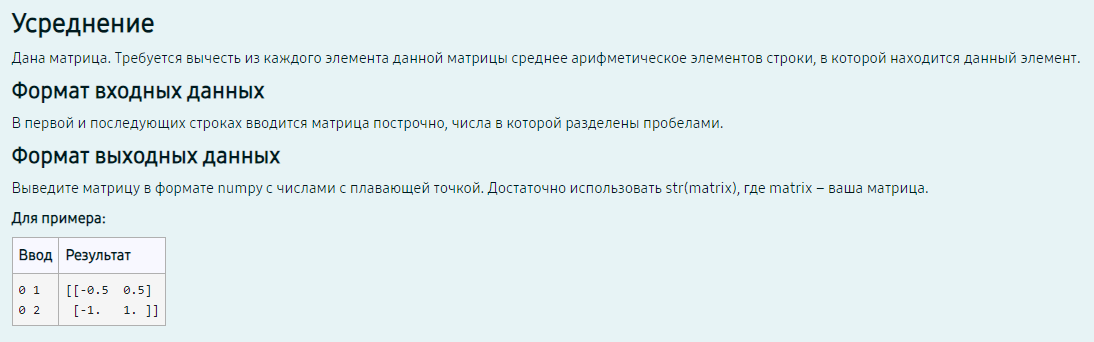

In [12]:
A = np.array([[0, 1], [0, 2]])
print(A - np.mean(A, axis=1, keepdims=True))

[[-0.5  0.5]
 [-1.   1. ]]


# 1.3. Библиотеки Pandas и Matplotlib

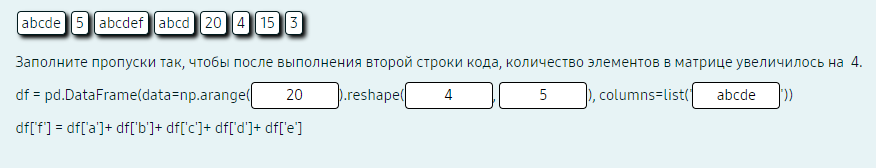

In [13]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data=np.arange(20).reshape(4, 5), columns=list('abcde'))

df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


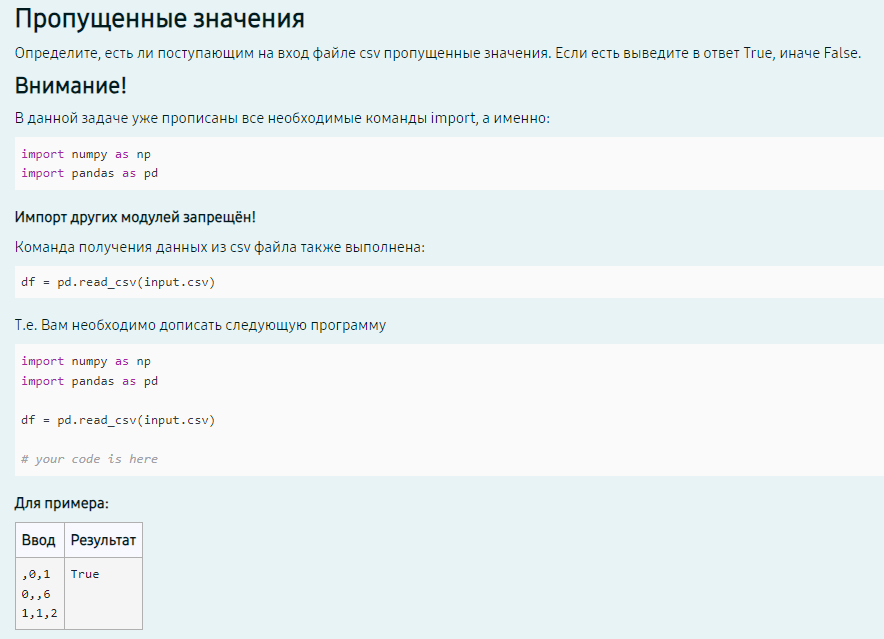

In [3]:
from io import StringIO
import pandas as pd

data = """,0,1
0,,6
1,1,2"""

# Чтение данных с помощью StringIO
df = pd.read_csv(StringIO(data), index_col=0)

for col in df.columns:
    for row in df.index:
        if df.loc[row, col] == '' or df.loc[row, col] == ' ':
            df.loc[row, col] = np.nan

df.isna().any().any()

True

In [8]:
print(df.isna().any().any())

True


In [19]:
df.isna().sum()

0    1
1    0
dtype: int64

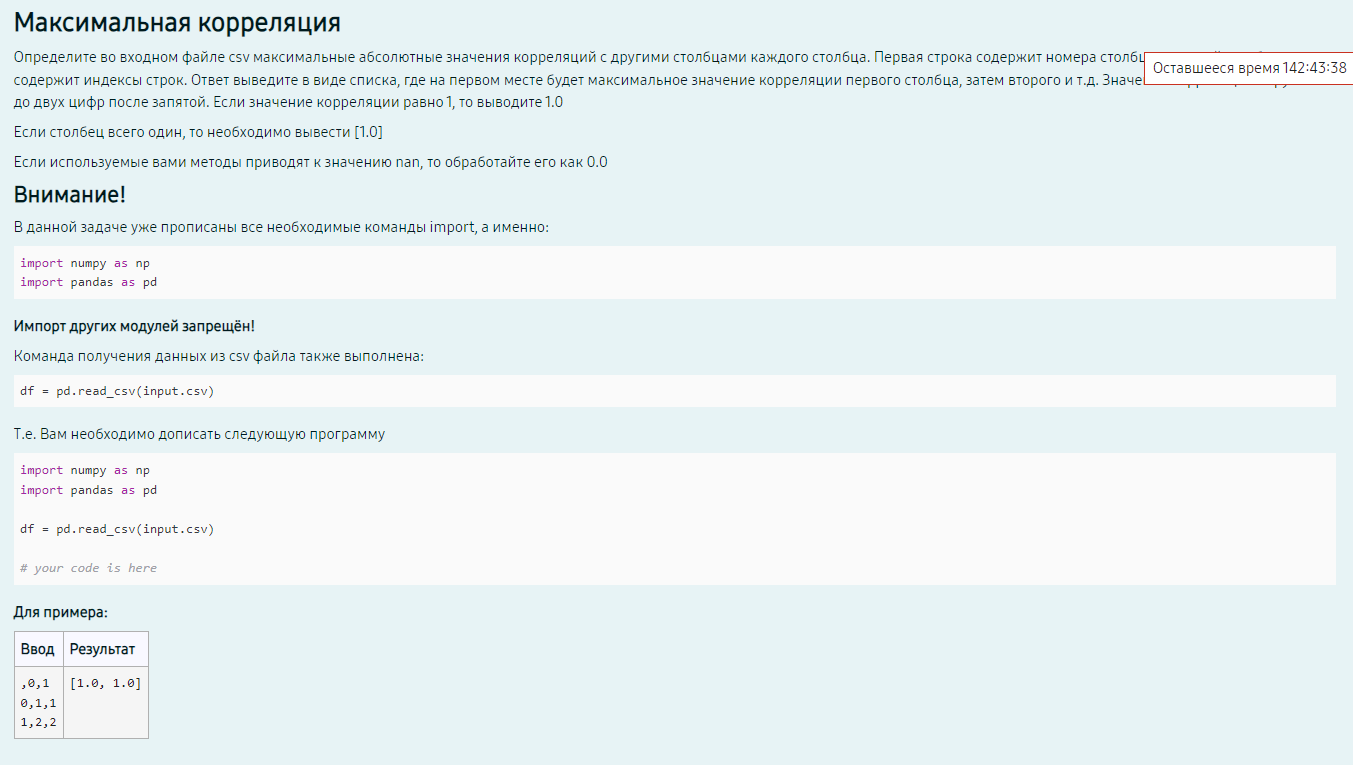

In [21]:
df = np.array([['', 0, 1], [0, 1, 1], [1, 2, 2]])

df = pd.DataFrame(df)

df.fillna(0.0, inplace=True)

# if isEmpty(df):
#    df = df.replace('', 0.0)

if df.shape[1] != 1:

    corr_matrix = df.corr().abs()

    print(corr_matrix)

Empty DataFrame
Columns: []
Index: []


C:\Users\Admin\AppData\Local\Temp\ipykernel_19768\2098192392.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [22]:
from sklearn.datasets import load_boston

boston = load_boston()
X = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])

X.isna().any().any()

X.isna().sum()

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [23]:
import numpy as np
import pandas as pd

df = X

if df.shape[1] == 1:
    print([1.0])
else:
    corr_matrix = df.corr().abs()

    corr_matrix = corr_matrix.fillna(0.0)

    max_corrs = []

    for col in corr_matrix.columns:

        max_corr = corr_matrix[col][corr_matrix[col] != 1.0].max()

        if pd.isna(max_corr):
            max_corr = 0.0

        max_corrs.append(round(max_corr, 2))

    print(max_corrs)


[0.63, 0.66, 0.76, 0.12, 0.77, 0.61, 0.75, 0.77, 0.91, 0.91, 0.46, 0.44, 0.61]


In [25]:
from io import StringIO
import numpy as np

df = pd.read_csv('input.csv')

df = df.drop(['Unnamed: 0'], axis=1).astype(float).fillna(0.0)

if df.shape[1] == 1:
    print([1.0])
else:
    corr_matrix = df.corr().abs()

    max_corrs = []

    for col in corr_matrix.columns:

        max_corr = 0.0

        for row in corr_matrix.index:

            if col != row and corr_matrix.loc[row, col] > max_corr:

                max_corr = corr_matrix.loc[row, col]

        max_corrs.append(round(max_corr, 2))
        
    print(max_corrs)


     0    1
0  1.0  1.0
1  1.0  1.0
[1.0, 1.0]


# 1.4. Элементы теории вероятностей и математической статистики

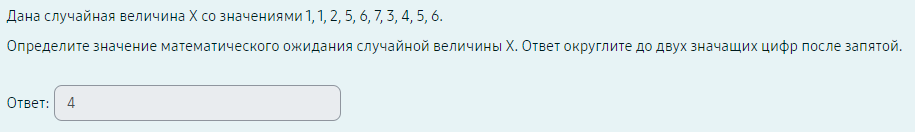

In [25]:
X = np.array([1, 1, 2, 5, 6, 7, 3, 4, 5, 6])

print(f'Математическое ожидание X: {np.mean(X)}')

Математическое ожидание X: 4.0


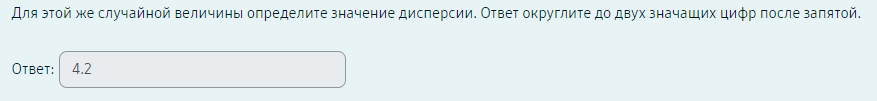

In [26]:
print(f'Дисперсия X: {np.var(X)}')

Дисперсия X: 4.2


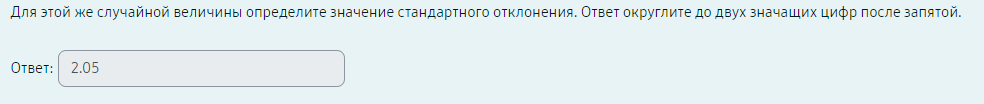

In [28]:
print(f'Среднее квадратичное отклонение X: {np.round(np.std(X), 2)}')

Среднее квадратичное отклонение X: 2.05


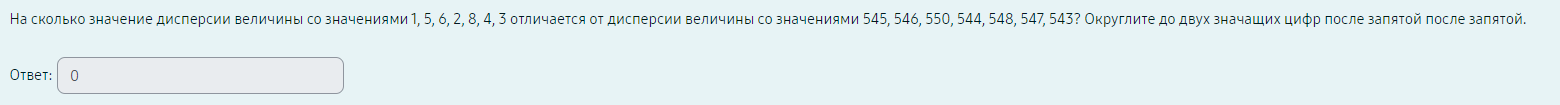

In [30]:
import numpy as np

A1 = np.array([1, 5, 6, 2, 8, 4, 3])
A2 = np.array([545, 546, 550, 544, 548, 547, 543])

vars_A1 = np.var(A1)
vars_A2 = np.var(A2)

print(f'Дисперсия первого массива: {vars_A1}')
print(f'Дисперсия второго массива: {vars_A2}')
print(f'Отличие дисперсий {np.var(A1) - np.var(A2)}')

Дисперсия первого массива: 4.979591836734694
Дисперсия второго массива: 4.979591836734694
Отличие дисперсий 0.0


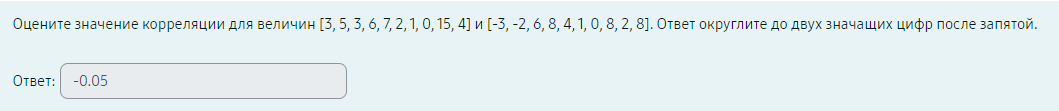

In [31]:
X1 = np.array([3, 5, 3, 6, 7, 2, 1, 0, 15, 4])
X2 = np.array([-3, -2, 6, 8, 4, 1, 0, 8, 2, 8])

print(f'Значение корреляции для этих величин: {round(np.corrcoef(X1, X2)[0, 1], 2)}')

Значение корреляции для этих величин: -0.05


# 1.5. Тестовые задачи

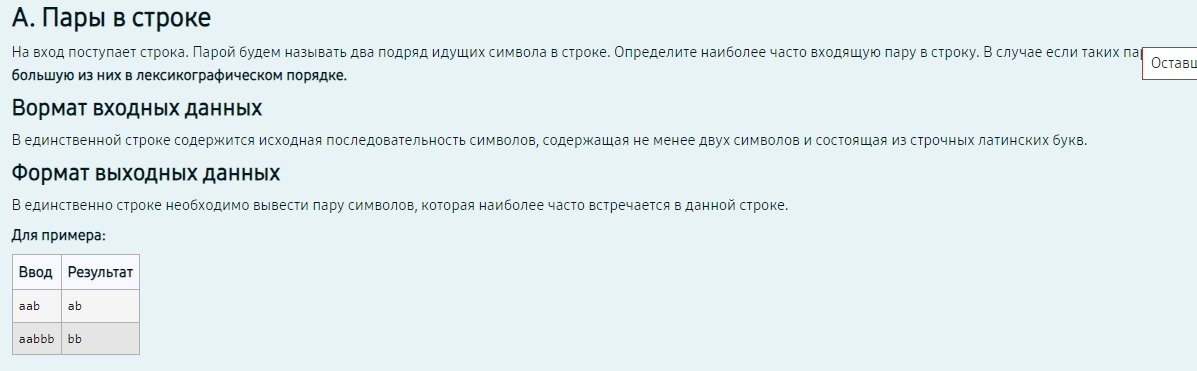

In [32]:
arr = str(input())

pair_dict = {}

for i in range(len(arr) - 1):
    pair = arr[i] + arr[i + 1]

    if pair in pair_dict:
        pair_dict[pair] += 1
    else:
        pair_dict[pair] = 1

max_key = max(pair_dict, key=lambda x: (pair_dict[x], x))

print(max_key)

bb


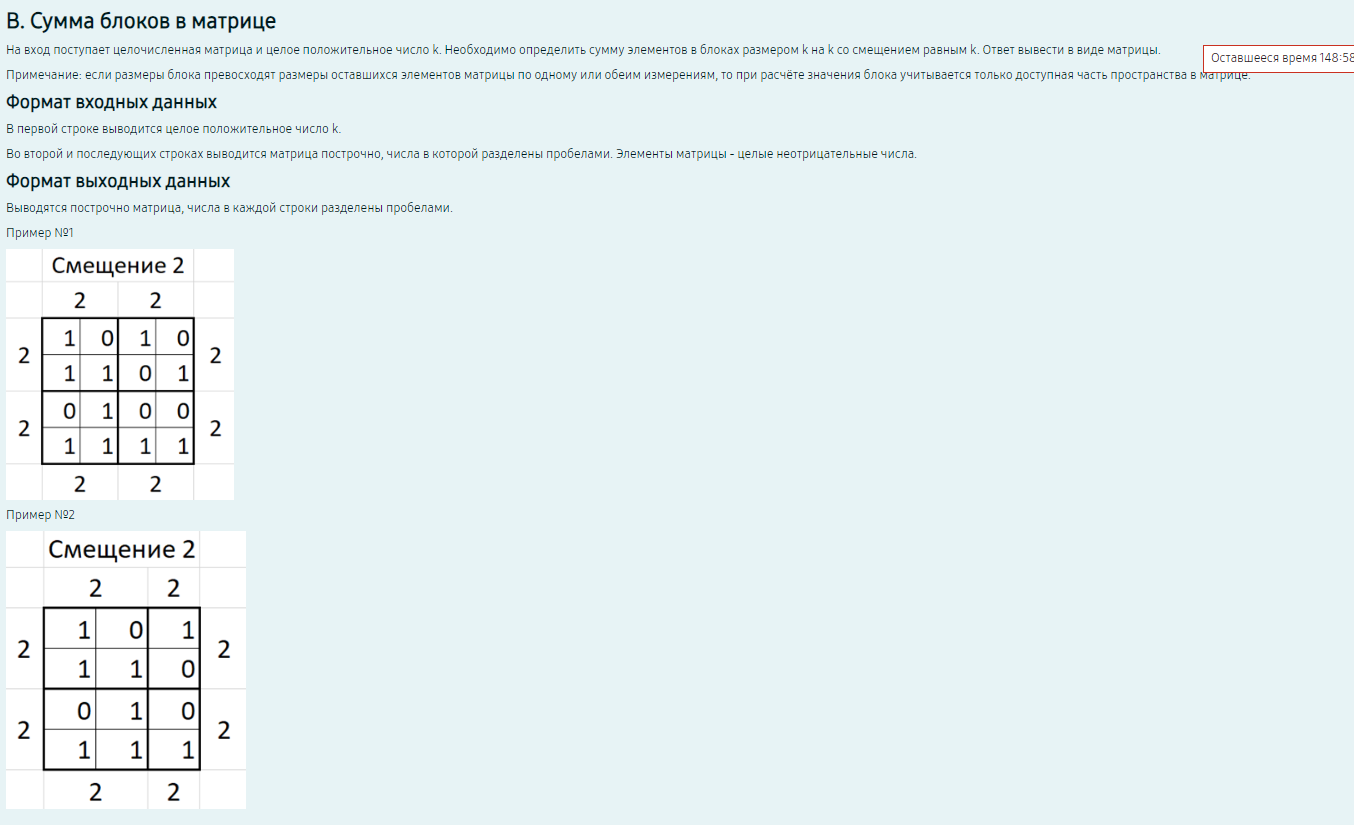

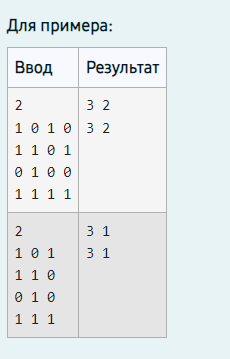

In [33]:
import numpy as np

k = 2
#A = np.array([[1, 0, 1, 0], [1, 1, 0, 1], [0, 1, 0, 0], [1, 1, 1, 1]])
A = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 0], [1, 1, 1]])

n = len(A) # длина строк
m = len(A[0]) # длина столбцов
result = []

for i in range(0, n, k):
    row = []
    for j in range(0, m, k):
        block_sum = 0
        for x in range(i, min(i + k, n)):
            for y in range(j, min(j + k, m)):
                block_sum += A[x][y]
        row.append(block_sum)
    result.append(row)

result = np.array(result).astype(int)

for row in result:
    print(*row)

3 1
3 1


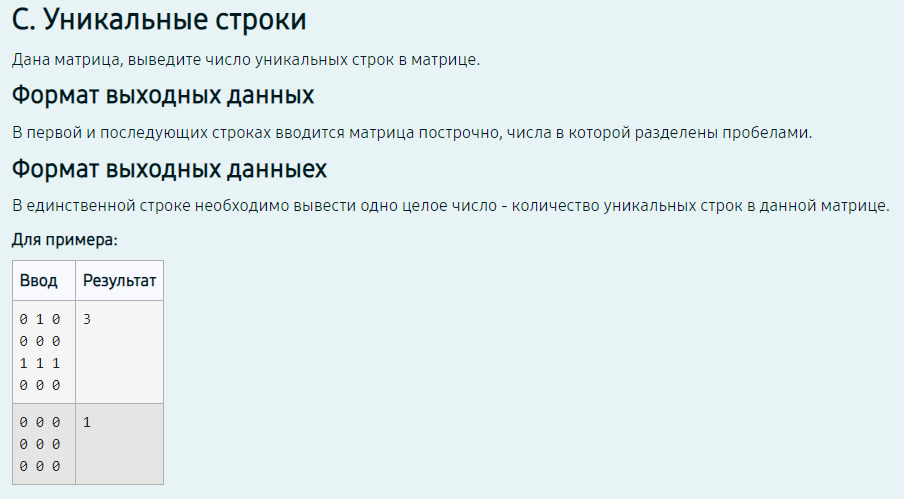

In [34]:
import numpy as np
import pandas as pd

A = np.array([[0, 1, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0]])
#A = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

unique_rows = set(tuple(row) for row in A)

print(len(unique_rows))

3


In [ ]:
import sys
import numpy as np

A = []
for line in sys.stdin:
    A.append([float(x) for x in line.split()])
A = np.array(A)

unique_rows = set(tuple(row) for row in A)

print(len(unique_rows))

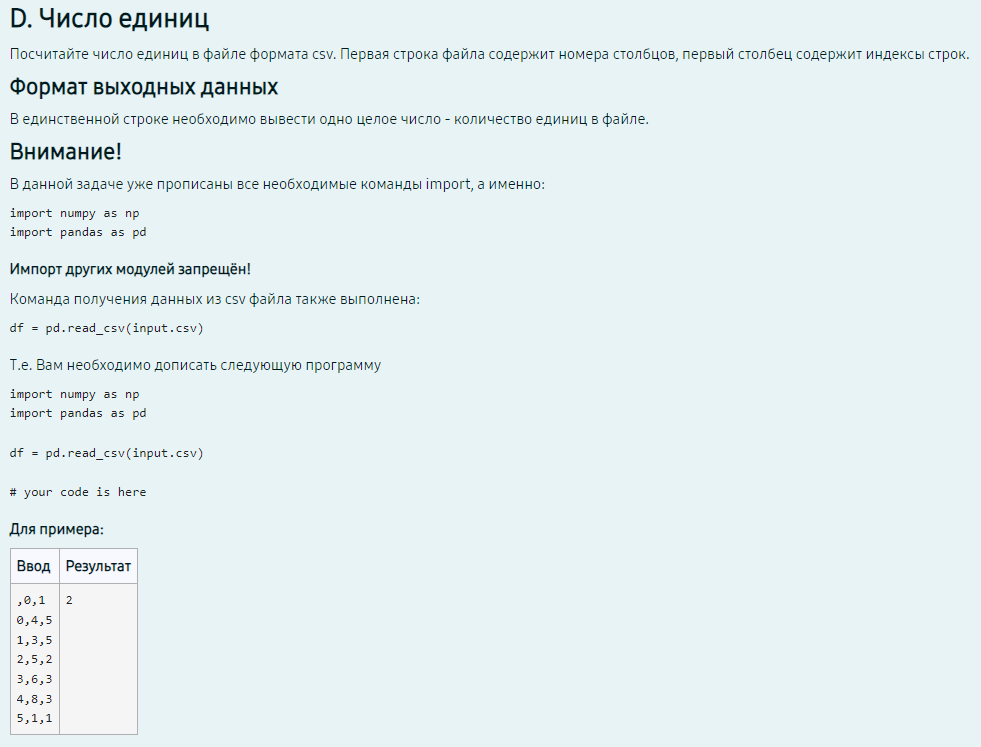

In [28]:
import numpy as np
import pandas as pd

df = pd.read_csv('input.csv')

df = df.drop(['Unnamed: 0'], axis=1)

print(f'Подсчет единичек первым способом: {(df == 1).sum().sum()}')
print(f'Подсчет единичек вторым способом: {df.count(1)[0]}')

def ones(df):
    sum = 0
    for col in df.columns:
        for row in df.index:
            if df.loc[row, col] == 1:
                sum += 1
    return sum

ones(df)

print(f'Подсчет единичек третьим способом: {ones(df)}')

Подсчет единичек первым способом: 2
Подсчет единичек вторым способом: 2
Подсчет единичек третьим способом: 2


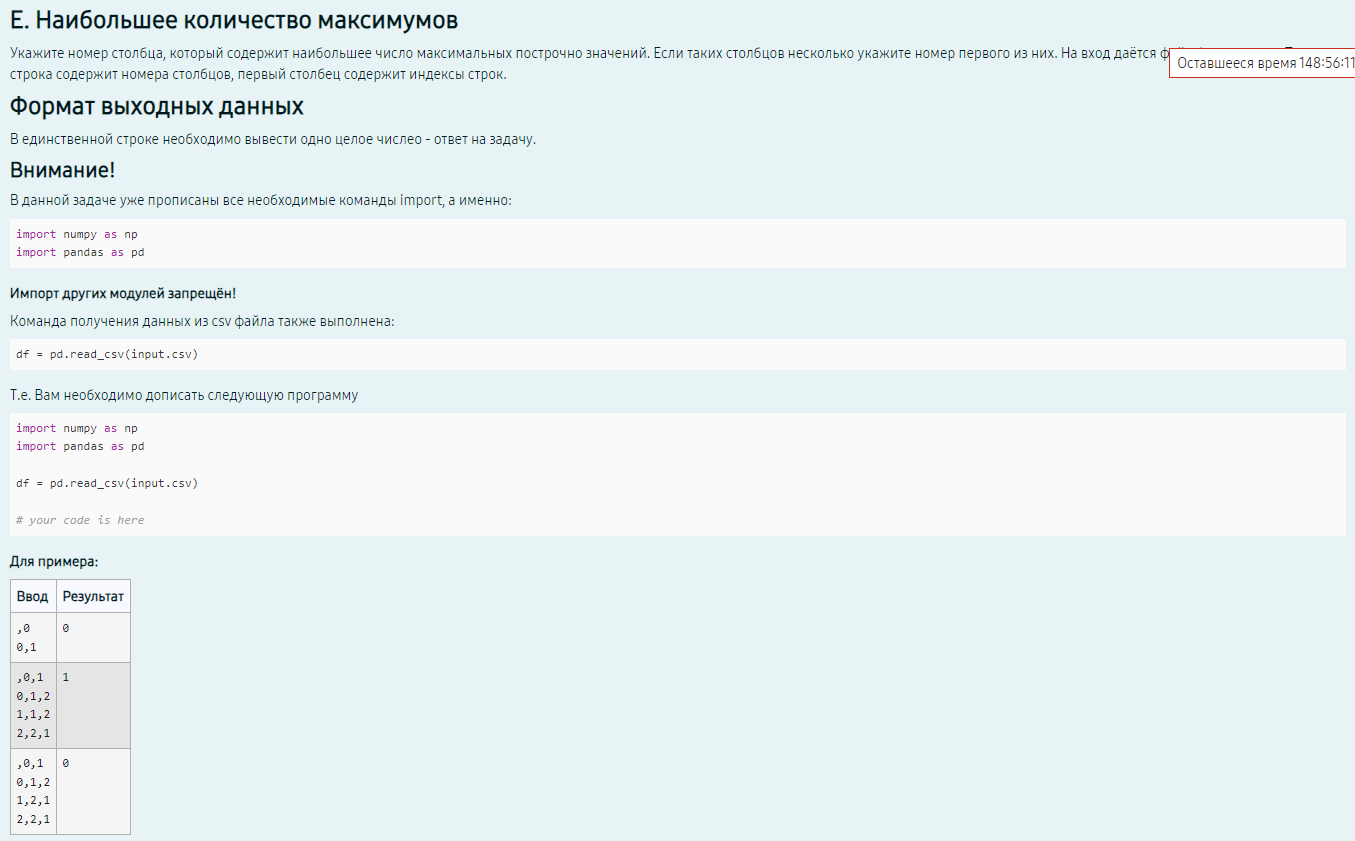

In [61]:
import numpy as np

df = pd.read_csv('input.csv')

df = df.drop(['Unnamed: 0'], axis=1).astype(float).fillna(0.0)

max_cols = {}

for row in df.index:

    row_max = df.loc[row].max()
    
    for col in df.columns:
        if df.loc[row, col] == row_max:

            if col in max_cols:
                max_cols[col] += 1
            else:
                max_cols[col] = 1

print(min(max_cols, key=lambda x : (-max_cols[x], int(x))))

0
